In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

from train import *
from models import *
import datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
import os

plt.xkcd()
plt.rcParams["figure.figsize"] = (10,5)

%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# Load the data
train_set = datasets.MiniplacesDataset('train')
val_set = datasets.MiniplacesDataset('val')
test_set = datasets.MiniplacesDataset('test')
classes = []
txt_root = './miniplaces/development_kit/data'
txt_dir = os.path.join(txt_root, "categories" + '.txt')
with open(txt_dir, 'r') as f:
    for line in f:
        tokens = line.strip().split()
        classes.append(tokens[0])

In [33]:
model = AdaHAN(hidden_size=8, n_classes=len(classes), k=5, adaptive=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [44]:
train_losses, train_accs, val_losses, val_accs = train(model, criterion, optimizer, 
                                                       train_set, val_set, num_epochs=10,
                                                       batch_size=16, device=device)

In [36]:
np.save("data/TRAIN_AdaHAN_hidden_size=8_k=5_adaptive_Adam_lr=0.001_batch=16_epochs=10.npy", 
        np.vstack([train_losses, train_accs]))
np.save("data/VAL_AdaHAN_hidden_size=8_k=5_adaptive_Adam_lr=0.001_batch=16_epochs=10.npy", 
        np.vstack([val_losses, val_accs]))
torch.save(model.state_dict(), "data/AdaHAN_hidden_size=8_k=5_adaptive_Adam_lr=0.001_batch=16_epochs=10.pth")

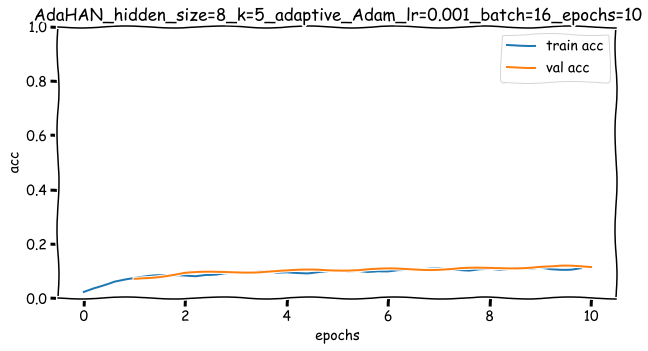

In [39]:
fig = plt.figure()
plt.plot([i * len(val_accs) / len(train_accs) for i in range(len(train_accs))], train_accs, label='train acc')
plt.plot([i+1 for i in range(len(val_accs))], val_accs, label='val acc')
plt.ylim(0, 1)
plt.title("AdaHAN_hidden_size=8_k=5_adaptive_Adam_lr=0.001_batch=16_epochs=10")
plt.ylabel("acc")
plt.xlabel("epochs")
plt.legend()

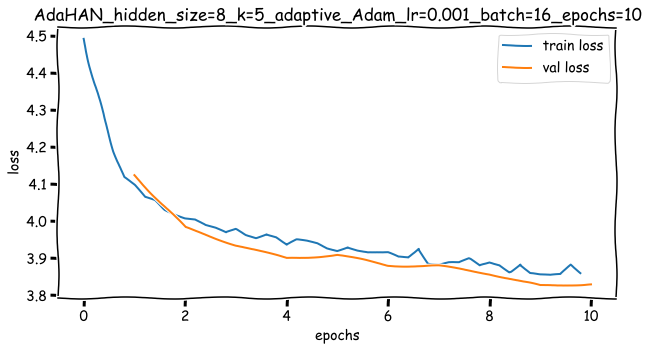

In [40]:
fig = plt.figure()
plt.plot([i * len(val_losses) / len(train_losses) for i in range(len(train_losses))], train_losses, label='train loss')
plt.plot([i+1 for i in range(len(val_losses))], val_losses, label='val loss')
plt.title("AdaHAN_hidden_size=8_k=5_adaptive_Adam_lr=0.001_batch=16_epochs=10")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

In [4]:
model = AdaHAN(hidden_size=8, n_classes=len(classes), k=5, adaptive=True)
model.load_state_dict(torch.load('./data/AdaHAN_hidden_size=8_k=5_adaptive_Adam_lr=0.001_batch=16_epochs=10.pth'))

<All keys matched successfully>

In [5]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=2)